In [ ]:
import georinex as gr
import time
import pickle
import numpy as np
from gpspos import gpspos_ecef, correctPosition
from gnsstimetrans import utctoweekseconds



In [ ]:
eph = gr.load("data/20200384.21n")
obs = gr.load('data/20200384.21o')

epoch_first = str(np.array(obs.time[0]))[0:19]
print(epoch_first)
epoch_last = str(np.array(obs.time[-1]))[0:19]
print(epoch_last)

In [ ]:
def SellectSystem(all_sat, system):
    system_letter = {
        'GPS': "G",
        'GLONASS': "R",
        'Beidou': "C",
        'Galileo': "E",
    }
    letter = system_letter.get(system, None)

    all_sat = np.array(all_sat)
    want_sat = []
    for i in range(len(all_sat)):
        if all_sat[i][0] == letter:
            want_sat = np.append(want_sat, all_sat[i])
    return want_sat

In [ ]:
 GPS = SellectSystem(eph.sv, 'GPS')

In [2]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  $filename :                                                                 +
#                                                                              +
#            Copyright (c) 2021.  by Y.Xie, All rights reserved.               +
#                                                                              +
#   references :                                                               +
#       [1] GPX The GNSS Time transformation https://www.gps.gov/technical/icwg/
#                                                                              +
#   version : $Revision:$ $Date:$                                              +
#   history : 2020/12/11  1.0  new                                             +
#             26/01/2021, 16:57  1.1  modify                               +
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

import georinex as gr
import time
import pickle
import numpy as np
from gnsstimetrans import utctoweekseconds
from gpspos import gpspos_ecef, correctPosition


def SellectSystem(all_sat, system):
    system_letter = {
        'GPS': "G",
        'GLONASS': "R",
        'Beidou': "C",
        'Galileo': "E",
    }
    letter = system_letter.get(system, None)

    all_sat = np.array(all_sat)
    want_sat = []
    for i in range(len(all_sat)):
        if all_sat[i][0] == letter:
            want_sat = np.append(want_sat, all_sat[i])
    return want_sat


if __name__ == '__main__':
    # load observation
    obs = gr.load('data/20200384.21o')
    # pickle.dump(obs, open('data/INSA002mA_21o_temp.txt', 'wb'))
    # obs = pickle.load(open('data/INSA003mA_21o_temp.txt', 'rb'))
    # print('finished')
    # end = time.clock()
    # print(end - start)

    # load correspond ephemeris
    epoch_first = str(np.array(obs.time[0]))[0:19]
    print(epoch_first)
    epoch_last = str(np.array(obs.time[-1]))[0:19]
    print(epoch_last)
    eph = gr.load('data/20200384.21n', tlim=[epoch_first, epoch_last])
    print("init obs eph")
    # list all available satellites
    GPS = SellectSystem(eph.sv, 'GPS')
    print('\nAvailable satellite:\n', GPS)
    P_obs = np.zeros([len(GPS), 1])
    P_computed = np.zeros([len(GPS), 1])
    A = np.zeros([len(GPS), 4])
    delta_P = np.zeros([len(GPS), 1])
    A[:, 3] = 299792458
    sat_pos = np.zeros([len(GPS), 3])
    

2021-01-02T12:00:00
2021-01-02T12:59:59
init obs eph

Available satellite:
 ['G05' 'G06' 'G07' 'G08' 'G09' 'G13' 'G14' 'G15' 'G16' 'G18' 'G23' 'G24'
 'G28' 'G30']


In [3]:
tList = []
for minute in range(0,60,12):
    second = 0
    tList.append(f"2021-01-02T12:{minute}:{second}")

GPS_row = []
for n in range(len(GPS)):
    GPS_row_singleSat = []
    for t in tList:
        # print('Use satellite:', GPS[n])
        ## calculate the position of satellite GPS_n
        GPS_n = eph.sel(sv=GPS[n]).dropna(dim='time', how='all')
        soW = utctoweekseconds(t, 0)[1]
        # print('Time of the week:', soW)
        GPS_n_pos_raw = gpspos_ecef(GPS_n, soW)
        GPS_row_singleSat.append(GPS_n_pos_raw)
        # print('\nPosition of satellite', GPS[n], ':\n', GPS_n_pos)
        print(GPS_n_pos_raw)
    GPS_row.append(GPS_row_singleSat)
    

[25155483.14402398 -3547670.35627412  7917488.68523686]
[25781170.69266123 -3315451.11462347  5766027.81572533]
[26218514.88913929 -3111923.44526672  3551475.30888235]
[26462360.53298381 -2918745.94106879  1298124.72604359]
[26511070.63165507 -2717125.38013132  -969389.58002382]
[ 13804963.68399585   5889928.09433397 -21853229.60679306]
[ 12652459.62809709   7542001.17056026 -22038698.92104457]
[ 11570987.00478826   9248600.12442014 -21979915.7149278 ]
[ 10574077.58453006  10987292.96248626 -21677463.86234706]
[  9672133.65816333  12734119.31808757 -21134644.68593519]
[-1183229.20589405 20877746.45331977 16411811.01802777]
[-2141230.5053668  21916220.41376287 14819112.55564382]
[-2976906.97689213 22867153.06653039 13062801.61396035]
[-3693520.6068628  23708828.41328916 11161619.18745536]
[-4297463.11254413 24420870.29117452  9136100.3491728 ]
[-9503553.04417963 13564366.95420733 20709170.52233395]
[-10395057.16282378  11857571.36700006  21339743.15526204]
[-11379628.75711387  10150889.

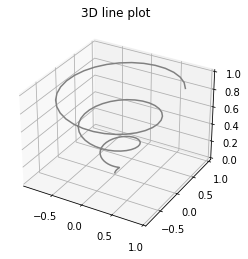

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
#创建3d绘图区域
ax = plt.axes(projection='3d')
#从三个维度构建
z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)
#调用 ax.plot3D创建三维线图
ax.plot3D(x, y, z, 'gray')
ax.set_title('3D line plot')
plt.show()

In [6]:
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout
# from matplotlib.backends.backend_qtagg import FigureCanvas, NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt

from matplotlib.backends.qt_compat import QtCore, QtWidgets
if QtCore.qVersion() >= "5.":
    from matplotlib.backends.backend_qt5agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
else:
    from matplotlib.backends.backend_qt4agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)

In [ ]:

from matplotlib.figure import Figure

def hua_qiu(x, y, z, r, dense):
    """
        圆心坐标 半径 稠密程度
    """
    t = np.linspace(0, np.pi * 2, dense)
    s = np.linspace(0, np.pi, dense)
    t, s = np.meshgrid(t, s)             # 生成稠密网格点
    x = x + r * np.sin(s) * np.cos(t)    # 球面坐标公式
    y = y + r * np.sin(s) * np.sin(t)
    z = z + r * np.cos(s)
    return x, y, z

class MainWin(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("matplotlib embeded in Python Qt with figure toolbar")
        self.initUI()
        self.plotfig()
        
    def initUI(self): 
        self.fig = plt.figure()                                                   #创建figure对象
        self.canvas=FigureCanvas(self.fig)                              #创建figure画布
        self.figtoolbar=NavigationToolbar(self.canvas, self)     #创建figure工具栏
       
        vlayout=QVBoxLayout()
        vlayout.addWidget(self.canvas)                                 #画布添加到窗口布局中
        vlayout.addWidget(self.figtoolbar)                             #工具栏添加到窗口布局中
        self.setLayout(vlayout)
        
    def plotfig(self):                                                            #绘制matplot图形
        print("plotfig")
#         ax = self.fig.subplots()
        print(self.fig)
        ax = plt.axes(projection='3d')
        GPS_n_pos_raw_part = GPS_row[:]
        for n in range(len(GPS)):
            x = [item[0] for item in GPS_n_pos_raw_part[n]]
            y = [item[1] for item in GPS_n_pos_raw_part[n]]
            z = [item[2] for item in GPS_n_pos_raw_part[n]]
    #         ax.plot(t,np.sin(t))
            ax.plot3D(x, y, z, 'gray')
        # plot earth
        xx, yy, zz = hua_qiu(x=0, y=0, z=0, r=3474.8/2*1000*10, dense=40)
        ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='gray', alpha=0.5) # cmap='rainbow',
        
        ax.autoscale_view()


app=QApplication(sys.argv)
win = MainWin()
win.show()
sys.exit(app.exec())

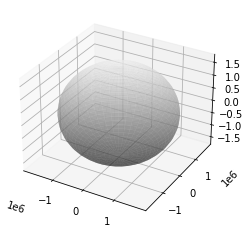

In [16]:
# x = np.outer(np.linspace(-3474.8/2*1000, 3474.8/2*1000, 30), np.ones(30))
# x
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# #求向量积(outer()方法又称外积)
# # x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
# #矩阵转置
# y = x.copy().T 
# #数据z
# z = (x ** 2 + y ** 2)
# #绘制曲面图
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # 调用plot_surface()函数
# ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
# ax.set_title('Surface plot')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np


def hua_qiu(x, y, z, r, dense):
    """
        圆心坐标 半径 稠密程度
    """
    t = np.linspace(0, np.pi * 2, dense)
    s = np.linspace(0, np.pi, dense)
    t, s = np.meshgrid(t, s)             # 生成稠密网格点
    x = x + r * np.sin(s) * np.cos(t)    # 球面坐标公式
    y = y + r * np.sin(s) * np.sin(t)
    z = z + r * np.cos(s)
    return x, y, z


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy, zz = hua_qiu(x=0, y=0, z=0, r=3474.8/2*1000, dense=40)
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='gray', alpha=0.5) # cmap='rainbow',
plt.show()


In [8]:
GPS_n_pos_raw

array([  8933810.29115592,  14323611.22254058, -20429755.64937826])

In [41]:
eph.Toe

<xarray.DataArray 'Toe' (time: 35, sv: 32)>
array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [489600.,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [    nan, 597600.,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,      0.,     nan]])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-31T02:00:00 ... 2021-01-03
  * sv       (sv) <U3 'G01' 'G02' 'G03' 'G04' 'G05' ... 'G29' 'G30' 'G31' 'G32'